In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties like correlation of the dataset.

In [2]:
train = pd.read_csv('/home/praveen/projects/melbourne/train.csv')
test = pd.read_csv('/home/praveen/projects/melbourne/test.csv')
sample = pd.read_csv('/home/praveen/projects/melbourne/sample_submission.csv')

In [3]:
train.head()

,Id,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,124,3,2,995000,1,135,6.3,3143,2,2,0,100.0,1998,26,145.01600,5,4836
1,5905,2,0,1080000,1,155,2.0,3066,1,0,0,94.0,1890,31,144.98863,2,4553
2,5963,3,0,725000,1,196,17.9,3082,2,2,602,129.0,1980,29,145.06912,2,10529
3,3521,4,0,1330000,1,251,8.0,3016,3,2,217,266.0,2003,10,144.87960,6,6380
4,3738,3,0,620000,1,221,12.4,3060,1,2,604,190.0,1970,23,144.96860,2,5070


In [4]:
test.head()

,Id,Rooms,Type,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,5067,4,0,1,32,27.0,3196,2,2,536,202.0,1985,12,145.13286,4,2076
1,3722,4,0,1,28,12.4,3060,2,2,567,116.0,1950,23,144.97030,2,5070
2,6820,5,0,1,16,12.4,3107,3,2,717,310.0,1963,-1,145.11320,0,5420
3,3103,2,2,1,196,3.3,3141,1,1,0,61.0,1965,26,144.98860,5,14887
4,2820,3,0,1,16,11.2,3073,2,1,618,149.0,1965,6,145.02120,2,21650


In [5]:
train.shape , test.shape

((4781, 17), (2049, 16))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             4781 non-null   int64  
 1   Rooms          4781 non-null   int64  
 2   Type           4781 non-null   int64  
 3   Price          4781 non-null   int64  
 4   Method         4781 non-null   int64  
 5   SellerG        4781 non-null   int64  
 6   Distance       4781 non-null   float64
 7   Postcode       4781 non-null   int64  
 8   Bathroom       4781 non-null   int64  
 9   Car            4781 non-null   int64  
 10  Landsize       4781 non-null   int64  
 11  BuildingArea   4781 non-null   float64
 12  YearBuilt      4781 non-null   int64  
 13  CouncilArea    4781 non-null   int64  
 14  Longtitude     4781 non-null   float64
 15  Regionname     4781 non-null   int64  
 16  Propertycount  4781 non-null   int64  
dtypes: float64(3), int64(14)
memory usage: 635.1 KB


In [7]:
train.describe()

,Id,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
count,4781.000000,4781.000000,4781.000000,4.781000e+03,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000
mean,3432.481908,2.964861,0.540473,1.080936e+06,1.441330,131.485254,10.045367,3103.308931,1.587952,1.605522,480.500105,143.157231,1964.338423,13.609705,144.991934,3.772223,7477.201213
std,1953.488159,0.957911,0.837337,6.757098e+05,1.141898,77.203630,5.871496,87.538064,0.711276,0.946698,899.489722,91.438501,38.064151,10.389644,0.103051,2.024068,4395.746550
min,0.000000,1.000000,0.000000,1.450000e+05,0.000000,2.000000,0.000000,3000.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-1.000000,144.545320,0.000000,389.000000
25%,1757.000000,2.000000,0.000000,6.300000e+05,1.000000,73.000000,6.100000,3044.000000,1.000000,1.000000,168.000000,94.000000,1940.000000,2.000000,144.927270,2.000000,4380.000000
50%,3434.000000,3.000000,0.000000,9.000000e+05,1.000000,135.000000,9.200000,3083.000000,1.000000,2.000000,411.000000,126.000000,1970.000000,15.000000,144.997500,5.000000,6567.000000
75%,5126.000000,4.000000,1.000000,1.337000e+06,1.000000,194.000000,13.000000,3147.000000,2.000000,2.000000,638.000000,172.000000,2000.000000,23.000000,145.055720,5.000000,10331.000000
max,6829.000000,8.000000,2.000000,9.000000e+06,4.000000,267.000000,47.300000,3977.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,32.000000,145.445300,7.000000,21650.000000


In [8]:
train.shape , test.shape

((4781, 17), (2049, 16))

In [9]:
train.isnull().sum()

Id               0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

<AxesSubplot:>

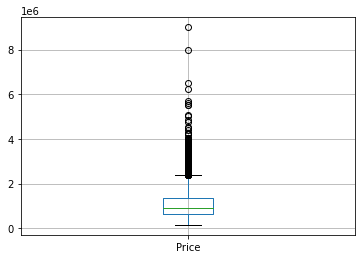

In [10]:
train.boxplot(column = 'Price')

In [11]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Id                 3369.00000
Rooms                 2.00000
Type                  1.00000
Price            707000.00000
Method                0.00000
SellerG             121.00000
Distance              6.90000
Postcode            103.00000
Bathroom              1.00000
Car                   1.00000
Landsize            470.00000
BuildingArea         78.00000
YearBuilt            60.00000
CouncilArea          21.00000
Longtitude            0.12845
Regionname            3.00000
Propertycount      5951.00000
dtype: float64


In [12]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [13]:
lowprice,uppprice = remove_outlier(train['Price'])
train['Price']=np.where(train['Price']>uppprice,uppprice,train['Price'])
train['Price']=np.where(train['Price']<lowprice,lowprice,train['Price'])

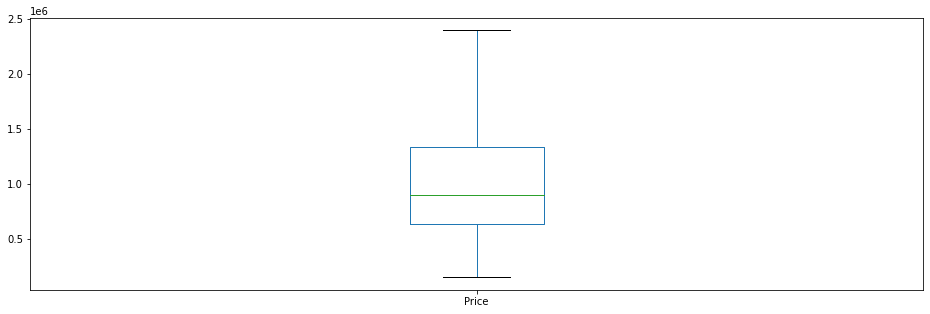

In [14]:
train['Price'].plot.box(figsize=(16,5))
plt.show()

In [19]:
test['Id']


0       5067
1       3722
2       6820
3       3103
4       2820
        ... 
2044    6339
2045    2687
2046    2564
2047     290
2048     239
Name: Id, Length: 2049, dtype: int64

## Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different regularization techniques.

In [20]:
train.drop(['Id'],axis=1,inplace=True)

In [21]:
train.head()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,3,2,995000.0,1,135,6.3,3143,2,2,0,100.0,1998,26,145.01600,5,4836
1,2,0,1080000.0,1,155,2.0,3066,1,0,0,94.0,1890,31,144.98863,2,4553
2,3,0,725000.0,1,196,17.9,3082,2,2,602,129.0,1980,29,145.06912,2,10529
3,4,0,1330000.0,1,251,8.0,3016,3,2,217,266.0,2003,10,144.87960,6,6380
4,3,0,620000.0,1,221,12.4,3060,1,2,604,190.0,1970,23,144.96860,2,5070


In [22]:
test.drop(['Id'],axis=1,inplace=True)

In [23]:
test.head()

,Rooms,Type,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,4,0,1,32,27.0,3196,2,2,536,202.0,1985,12,145.13286,4,2076
1,4,0,1,28,12.4,3060,2,2,567,116.0,1950,23,144.97030,2,5070
2,5,0,1,16,12.4,3107,3,2,717,310.0,1963,-1,145.11320,0,5420
3,2,2,1,196,3.3,3141,1,1,0,61.0,1965,26,144.98860,5,14887
4,3,0,1,16,11.2,3073,2,1,618,149.0,1965,6,145.02120,2,21650


In [24]:
data = pd.get_dummies(train)
data.head()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,3,2,995000.0,1,135,6.3,3143,2,2,0,100.0,1998,26,145.01600,5,4836
1,2,0,1080000.0,1,155,2.0,3066,1,0,0,94.0,1890,31,144.98863,2,4553
2,3,0,725000.0,1,196,17.9,3082,2,2,602,129.0,1980,29,145.06912,2,10529
3,4,0,1330000.0,1,251,8.0,3016,3,2,217,266.0,2003,10,144.87960,6,6380
4,3,0,620000.0,1,221,12.4,3060,1,2,604,190.0,1970,23,144.96860,2,5070


In [25]:
data_test = pd.get_dummies(test)
data_test.head()

,Rooms,Type,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,4,0,1,32,27.0,3196,2,2,536,202.0,1985,12,145.13286,4,2076
1,4,0,1,28,12.4,3060,2,2,567,116.0,1950,23,144.97030,2,5070
2,5,0,1,16,12.4,3107,3,2,717,310.0,1963,-1,145.11320,0,5420
3,2,2,1,196,3.3,3141,1,1,0,61.0,1965,26,144.98860,5,14887
4,3,0,1,16,11.2,3073,2,1,618,149.0,1965,6,145.02120,2,21650


<AxesSubplot:>

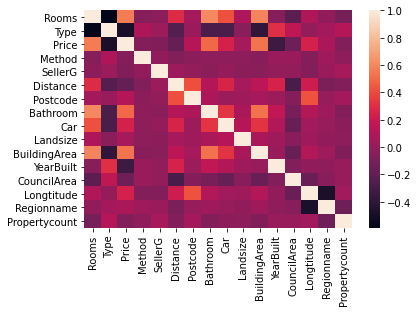

In [26]:
sns.heatmap(train.corr())

In [27]:
X = data.drop(columns=['Price'])
y = data['Price']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,train_size =0.75, random_state=0)

In [29]:
X_train.shape , X_val.shape ,y_train.shape , y_val.shape

((3585, 15), (1196, 15), (3585,), (1196,))

In [30]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,accuracy_score

In [32]:
train = pd.read_csv('/home/praveen/projects/melbourne/train.csv')
test = pd.read_csv('/home/praveen/projects/melbourne/test.csv')
sample = pd.read_csv('/home/praveen/projects/melbourne/sample_submission.csv')# Initializing the Linear regression model
lr = LinearRegression()
# Fitting the data
lr.fit(X,y)
# Getting the predictions on the test data
y_pred = lr.predict(X)
# Finding the RMSE
rmse_lr = mean_squared_error(y,y_pred) ** 0.5




In [33]:
from sklearn.linear_model import Lasso

# Code starts here
lasso = Lasso()
# instantiate lasso model
lasso.fit(X,y)


# fit and predict
lasso_pred = lasso.predict(X)


# calculate RMSE
lasso_rmse = np.sqrt(mean_squared_error(lasso_pred,y))
print(lasso_rmse)

# check how many feature coefficients are zero
zero_features = sum(lasso.coef_==0)


299747.5964113249


In [34]:
ridge = Ridge()

# fit and predict
ridge.fit(X,y)
ridge_pred = ridge.predict(X)

# calculate RMSE
ridge_rmse = np.sqrt(mean_squared_error(ridge_pred,y))
print(ridge_rmse)



299772.1117658759


In [35]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
print(y_train)
print(y_val)

857     14.689938
1688    14.124098
2200    12.584513
925     12.936036
2592    13.664689
          ...    
1033    12.611541
3264    13.190024
1653    14.085538
2607    13.122365
2732    13.545015
Name: Price, Length: 3585, dtype: float64
3713    14.108181
629     13.973369
3239    13.910822
4315    14.151984
4335    13.859528
          ...    
1526    12.524530
4194    13.698978
2984    14.022526
3453    12.392556
4138    14.431777
Name: Price, Length: 1196, dtype: float64


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [36]:
y_final = lr.predict(data_test)

In [37]:
len(y_final)

2049

In [38]:
test['Id']

0       5067
1       3722
2       6820
3       3103
4       2820
        ... 
2044    6339
2045    2687
2046    2564
2047     290
2048     239
Name: Id, Length: 2049, dtype: int64

In [41]:
test.shape

(2049, 16)